In [25]:
!pip install efficientnet-pytorch

from fastai import *
from fastai.vision import *
from efficientnet_pytorch import EfficientNet

path = untar_data(URLs.PETS)
path_anno = path/'annotations'
path_img = path/'images'
fnames = get_image_files(path_img)
pat = r'/([^/]+)_\d+.jpg$'

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=32
                                  ).normalize(imagenet_stats)

model = EfficientNet.from_pretrained('efficientnet-b0')
model._fc = nn.Linear(1280, data.c)
learn = Learner(data, model, metrics=[accuracy])

Downloading: "http://storage.googleapis.com/public-models/efficientnet/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 178MB/s]

Loaded pretrained weights for efficientnet-b0


In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


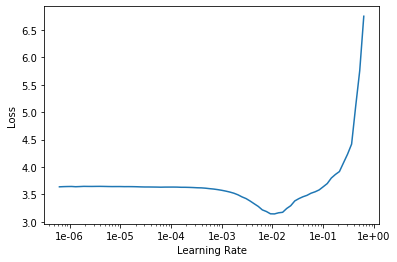

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(10, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.816759,0.738323,0.766576,01:21
1,1.254801,11.293137,0.085927,01:20
2,1.282108,3.890561,0.271313,01:20
3,1.081234,3.151679,0.439107,01:20
4,0.907075,1.731889,0.608254,01:20
5,0.707357,1.081664,0.705007,01:20
6,0.492177,0.552482,0.837618,01:20
7,0.335502,0.468960,0.852503,01:20
8,0.164215,0.376563,0.892422,01:20
9,0.140730,0.346857,0.894452,01:20


In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


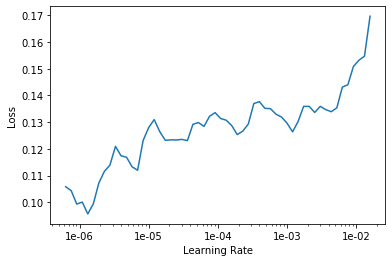

In [30]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.137328,0.336687,0.896482,01:20
1,0.131916,0.336451,0.895129,01:20
2,0.115218,0.334588,0.896482,01:20
